In [103]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import chart_studio.plotly as py
import chart_studio
import matplotlib.pyplot as plt

chart_studio.tools.set_credentials_file(username='oystein.nerva', api_key='0ODcZ6UisJ8n0AjEQt9N')

In [104]:
url = 'https://github.com/NRVA/COVID19_Norge/raw/master/COVID19_fhi_data_fylke.csv'
data = pd.read_csv(url, sep=';')
data

,Fylke,02.mar.20,03.mar.20,04.mar.20,05.mar.20,06.mar.20,07.mar.20,08.mar.20,09.mar.20,10.mar.20,...,21.mar.20,22.mar.20,23.mar.20,24.mar.20,25.mar.20,26.mar.20,27.mar.20,28.mar.20,29.mar.20,30.mar.20
0,Agder,2,3,3,7,7,9,9,17,19,...,82,91,91,92,128,134,148,159,161,166
1,Innlandet,0,0,3,4,12,12,12,14,16,...,125,148,151,163,193,198,200,228,246,258
2,Møre og Romsdal,0,0,1,2,2,2,2,4,5,...,32,38,44,46,66,71,74,81,81,81
3,Nordland,0,0,0,0,1,2,3,3,3,...,17,18,18,18,27,29,36,42,46,48
4,Oslo,7,7,14,18,23,29,35,35,51,...,448,523,636,640,647,744,903,989,1118,1169
5,Rogaland,0,0,3,6,11,14,19,25,33,...,199,219,237,251,253,270,277,304,305,305
6,Troms og Finnmark,1,2,2,2,6,6,6,6,6,...,37,49,55,59,75,93,116,129,143,146
7,Trøndelag,0,0,1,7,15,18,19,22,22,...,122,131,144,158,196,236,261,281,296,311
8,Vestfold og Telemark,0,0,0,2,2,2,3,5,5,...,81,85,87,95,114,136,146,149,154,163
9,Vestland,9,12,17,22,24,24,24,28,31,...,200,214,234,279,346,375,410,436,445,460


In [105]:
url = "https://github.com/NRVA/COVID19_Norge/raw/master/Fylkestilhorighet_2020.csv"
fylker = pd.read_csv(url, sep=';')
fylker

,Fylke,RHF,Befolkning
0,Agder,Helse Sør-Øst,307231
1,Innlandet,Helse Sør-Øst,371385
2,Møre og Romsdal,Helse Midt-Norge,265238
3,Nordland,Helse Nord,241235
4,Oslo,Helse Sør-Øst,693494
5,Rogaland,Helse Vest,479892
6,Troms og Finnmark,Helse Nord,243311
7,Trøndelag,Helse Midt-Norge,468702
8,Vestfold og Telemark,Helse Sør-Øst,419396
9,Vestland,Helse Vest,636531


In [106]:
df = data.melt(id_vars=['Fylke']).copy()
df['variable'] = pd.to_datetime(df['variable'], errors='coerce')
df = df.groupby(["Fylke", pd.Grouper(key="variable", freq="d")]).max().reset_index()
df = df.pivot(index="variable", columns="Fylke", values="value")

restart = df.copy()

df.head()

Fylke,Agder,Innlandet,Møre og Romsdal,Nordland,Oslo,Rogaland,Troms og Finnmark,Trøndelag,Vestfold og Telemark,Vestland,Viken
variable,,,,,,,,,,,
2020-03-02,2,0,0,0,7,0,1,0,0,9,5
2020-03-03,3,0,0,0,7,0,2,0,0,12,8
2020-03-04,3,3,1,0,14,3,2,1,0,17,19
2020-03-05,7,4,2,0,18,6,2,7,2,22,23
2020-03-06,7,12,2,1,23,11,6,15,2,24,26


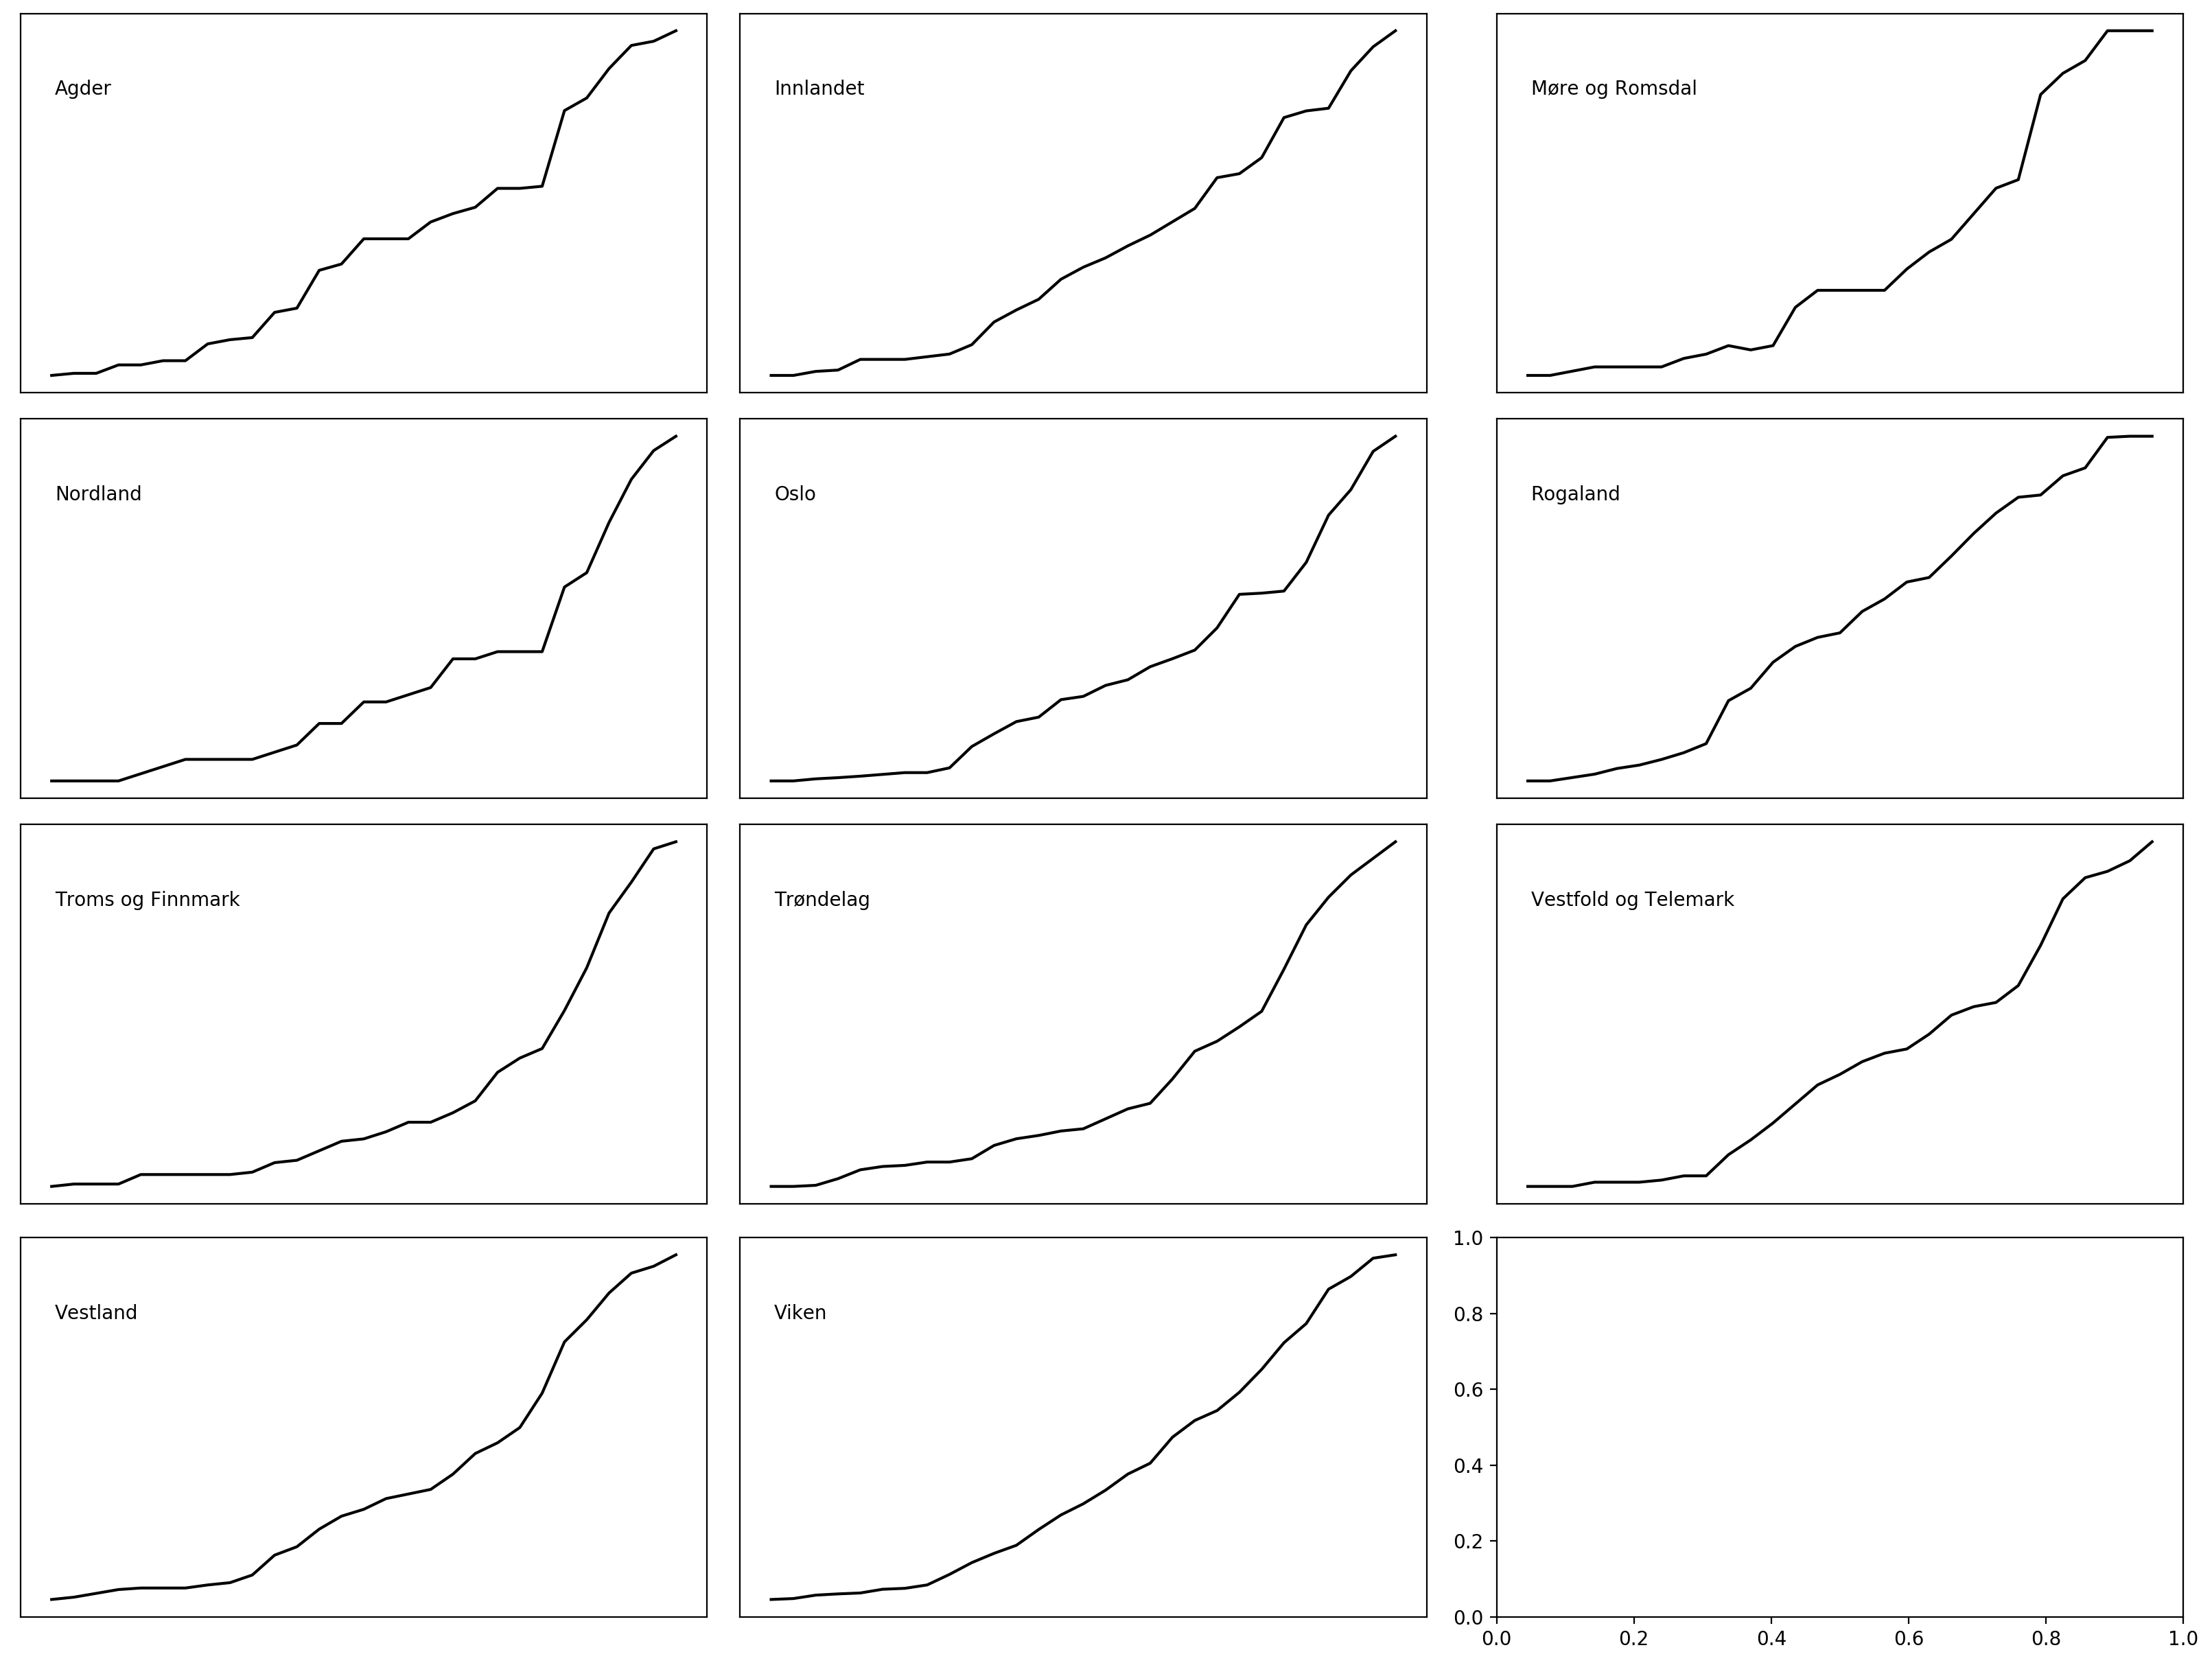

In [107]:
fig = plt.figure(figsize=(16,12), dpi=200, constrained_layout=True)

axs = fig.subplots(nrows=4, ncols=3)

for i in range(len(df.columns)):
    axs.flat[i].plot(df.index, df.iloc[:,i], color='black')
    axs.flat[i].get_xaxis().set_ticks([])
    axs.flat[i].get_yaxis().set_ticks([])
    axs.flat[i].annotate(df.iloc[:,i].name, (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')
    
fig.savefig('fylker_matrix.png')

In [108]:
unstacked = df.unstack().reset_index()

unstacked = unstacked[pd.to_datetime(unstacked["variable"]) >= pd.to_datetime("2020-02-25")]

unstacked.head()

,Fylke,variable,0
0,Agder,2020-03-02,2
1,Agder,2020-03-03,3
2,Agder,2020-03-04,3
3,Agder,2020-03-05,7
4,Agder,2020-03-06,7


# moment

In [109]:
roc = df.copy()
roc = roc.pct_change(periods=2)*100/3

roc.iloc[[-1]].melt()
roc1 = roc.iloc[[-1]].melt().rename(columns={"value": "Vekstrate"}).sort_values(by=['Vekstrate'], ascending=True)
lastweek = roc.iloc[[-7]].melt().rename(columns={"value": "- 1 uke"})

vekst = roc1.merge(lastweek, how="left", on="Fylke")
vekst.head()

,Fylke,Vekstrate,- 1 uke
0,Møre og Romsdal,0.000000,7.017544
1,Rogaland,0.109649,4.870624
2,Agder,1.467505,0.366300
3,Vestland,1.834862,10.124611
4,Viken,2.226463,7.208672


In [110]:
vekst["dtime"] = np.log(2)/np.log(1+(vekst["Vekstrate"]/100))
#vekst["dtime"] = (72/(vekst["Vekstrate"]))
vekst["momentum"] = vekst["Vekstrate"]-vekst["- 1 uke"]
vekst["momentum"] = vekst["momentum"].apply(lambda x: "Avtagende" if x < 0 else "Tiltagende")
vekst["text"] = "Hver "+vekst["dtime"].round(0).astype(str)+" dag"
vekst["Vekstrate"] = vekst["Vekstrate"].round(2)
vekst["- 1 uke"] = vekst["- 1 uke"].round(2)
vekst = vekst.merge(fylker, how="left", on="Fylke")

vekst

,Fylke,Vekstrate,- 1 uke,dtime,momentum,text,RHF,Befolkning
0,Møre og Romsdal,0.00,7.02,inf,Avtagende,Hver inf dag,Helse Midt-Norge,265238
1,Rogaland,0.11,4.87,632.496739,Avtagende,Hver 632.0 dag,Helse Vest,479892
2,Agder,1.47,0.37,47.578761,Tiltagende,Hver 48.0 dag,Helse Sør-Øst,307231
3,Vestland,1.83,10.12,38.122045,Avtagende,Hver 38.0 dag,Helse Vest,636531
4,Viken,2.23,7.21,31.477512,Avtagende,Hver 31.0 dag,Helse Sør-Øst,1241165
5,Vestfold og Telemark,3.13,3.92,22.475992,Avtagende,Hver 22.0 dag,Helse Sør-Øst,419396
6,Trøndelag,3.56,6.87,19.821990,Avtagende,Hver 20.0 dag,Helse Midt-Norge,468702
7,Innlandet,4.39,3.38,16.147850,Tiltagende,Hver 16.0 dag,Helse Sør-Øst,371385
8,Troms og Finnmark,4.39,6.80,16.123382,Avtagende,Hver 16.0 dag,Helse Nord,243311
9,Nordland,4.76,0.00,14.899977,Tiltagende,Hver 15.0 dag,Helse Nord,241235


In [111]:
from datetime import datetime

legend = [i for i in vekst["RHF"].unique()]
legend.sort()

fig = px.bar(vekst, 
             x='Vekstrate', y='Fylke', 
             orientation='h',
             category_orders={"RHF": legend},
             height=500,
             title = "<b>Endringer i antall registrerte smittede pr fylke</b><br>Gjennomsnittlig veksttakt siste tre dager<br>Datakilde: FHI - folkehelseinstituttet. Oppdatert " +datetime.today().strftime('%d.%m.%Y'),
             color='RHF',
             text="text",
             hover_name="Fylke",
             hover_data=["Vekstrate"],
             template = "plotly_white", 
             labels = {"Vekstrate": "daglig vekst (%)", "- 1 uke": "Daglig vekst for en uke siden", "text": "Dager før dobling med dagens vekst"},
            )

"""
fig.add_shape(
        # doubling time 2 days
        dict(
            type="line",
            x0=41.42136,
            y0=-0.5,
            x1=41.42136,
            y1=21.5,
            line=dict(
                color="Black",
                width=1
            )))
fig.add_shape(
        # doubling time 1 uke
        dict(
            type="line",
            x0=10.40895,
            y0=-0.5,
            x1=10.40895,
            y1=21.5,
            line=dict(
                color="Black",
                width=1
            )))

"""
fig.layout.coloraxis.showscale = False

fig.update_layout(
    yaxis=dict(
        separatethousands=True,
        categoryorder = 'total ascending',
        title_text="",
        fixedrange=True,
    ), xaxis=dict(fixedrange=True,
                 title_text=""),
    title_font=dict(family="Helvetica", size=18),
        margin=dict(b=150)) #bottom margin

fig.update_layout(autosize=True,
    margin=dict(l=100, r=100, t=150, b=0),
    paper_bgcolor='rgba(0, 0, 0, 0)'
    #plot_bgcolor='rgb(248, 248, 255)'    
                 )

#plotly.offline.plot(fig, filename='COVID_moment_fylke.html')
py.plot(fig, filename='COVID19_vekstmomentum_fylker.html', auto_open=False)
fig.show()

# animation

In [112]:
melted = pd.melt(df.reset_index(), id_vars=["variable"], var_name="Fylke", value_name="Registrerte smittede").dropna().sort_values(by=["variable"])
melted["variable"] = melted["variable"].apply(lambda x: x.strftime("%d %b"))
melted = melted.merge(fylker, how="left", on="Fylke")
melted["Smittede/tusen innb"] = melted["Registrerte smittede"]/(melted["Befolkning"]/1000)
melted["txt"] = melted["Smittede/tusen innb"].round(2).astype(str)
melted.head()

,variable,Fylke,Registrerte smittede,RHF,Befolkning,Smittede/tusen innb,txt
0,02 Mar,Agder,2,Helse Sør-Øst,307231,0.006510,0.01
1,02 Mar,Viken,5,Helse Sør-Øst,1241165,0.004028,0.0
2,02 Mar,Innlandet,0,Helse Sør-Øst,371385,0.000000,0.0
3,02 Mar,Trøndelag,0,Helse Midt-Norge,468702,0.000000,0.0
4,02 Mar,Oslo,7,Helse Sør-Øst,693494,0.010094,0.01


In [114]:
legend = [i for i in vekst["RHF"].unique()]
legend.sort()

fig = px.bar(melted, 
             x='Registrerte smittede', y='Fylke', animation_frame="variable",
             animation_group="Fylke",
             orientation='h',
             category_orders={"RHF": legend},
             labels = {"Veksttakt": "daglig vekst (%)", "variable": "Dato"},
             color='RHF',
             text="Registrerte smittede",
             height=600,
             title = "<b>COVID19: Registrert smittet i Norge</b><br>Fordeling per fylke<br>Datakilde: FHI - folkehelseinstituttet. Oppdatert " +datetime.today().strftime('%d.%m.%Y'),
             template = "plotly_white",
             range_x=[0,1200]
                 ).update_yaxes(categoryorder="total ascending")

fig.layout.coloraxis.showscale = False

fig.update_layout(
    yaxis=dict(
        separatethousands=True,
        categoryorder = 'total ascending',
        title_text="",
        fixedrange=True,
    ), xaxis=dict(fixedrange=True,
                 title_text=""),
    title_font=dict(family="Helvetica", size=18),
        margin=dict(b=150)) #bottom margin

fig.update_layout(autosize=True,
    margin=dict(l=100, r=100, t=150, b=0),
    paper_bgcolor='rgba(0, 0, 0, 0)'
    #plot_bgcolor='rgb(248, 248, 255)'    
                 )

#plotly.offline.plot(fig, filename='COVID19_fylkesutvikling_animation.html')
py.plot(fig, filename='COVID19_fylkesutvikling_animation.html', auto_open=False)
fig.show()

In [115]:
legend = [i for i in vekst["RHF"].unique()]
legend.sort()

fig = px.bar(melted, 
             x='Smittede/tusen innb', y='Fylke', animation_frame="variable",
             animation_group="Fylke",
             orientation='h',
             category_orders={"RHF": legend},
             labels = {"Veksttakt": "daglig vekst (%)", "variable": "Dato"},
             color='RHF',
             text="txt",
             height=600,
             title = "<b>COVID19: Registrert smittet i Norge</b><br>Antall smittet per 1 000 innbyggere<br>Datakilde: FHI - folkehelseinstituttet. Oppdatert " +datetime.today().strftime('%d.%m.%Y'),
             template = "plotly_white",
             range_x=[0,2]
                 ).update_yaxes(categoryorder="total ascending")

fig.layout.coloraxis.showscale = False

fig.update_layout(
    yaxis=dict(
        separatethousands=True,
        categoryorder = 'total ascending',
        title_text="",
        fixedrange=True,
    ), xaxis=dict(fixedrange=True,
                 title_text="per 1 000"),
    title_font=dict(family="Helvetica", size=18),
        margin=dict(b=150)) #bottom margin

fig.update_layout(autosize=True,
    margin=dict(l=100, r=100, t=150, b=0),
    paper_bgcolor='rgba(0, 0, 0, 0)'
    #plot_bgcolor='rgb(248, 248, 255)'    
                 )

py.plot(fig, filename='COVID19_per_capita_fylkesutvikling_animation.html', auto_open=False)
fig.show()

# sammenligning fra registrering nr 10

In [116]:
restart.head()

Fylke,Agder,Innlandet,Møre og Romsdal,Nordland,Oslo,Rogaland,Troms og Finnmark,Trøndelag,Vestfold og Telemark,Vestland,Viken
variable,,,,,,,,,,,
2020-03-02,2,0,0,0,7,0,1,0,0,9,5
2020-03-03,3,0,0,0,7,0,2,0,0,12,8
2020-03-04,3,3,1,0,14,3,2,1,0,17,19
2020-03-05,7,4,2,0,18,6,2,7,2,22,23
2020-03-06,7,12,2,1,23,11,6,15,2,24,26


In [117]:
restart = pd.melt(restart.reset_index(), id_vars=["variable"])
restart[restart["value"] < 6.5] = np.nan
restart = restart.apply(lambda x: pd.Series(x.dropna().values))
restart.head()

,variable,Fylke,value
0,2020-03-05,Agder,7.0
1,2020-03-06,Agder,7.0
2,2020-03-07,Agder,9.0
3,2020-03-08,Agder,9.0
4,2020-03-09,Agder,17.0


In [118]:
restart = restart.groupby(["Fylke"], as_index=False)
restart = restart.apply(lambda x: x.reset_index(drop=True)).reset_index()
restart["variable"] = restart["variable"].apply(lambda x: x.strftime("%d %b"))
restart = restart.merge(fylker, how="left", on="Fylke")
restart.head()

,level_0,level_1,variable,Fylke,value,RHF,Befolkning
0,0,0,05 Mar,Agder,7.0,Helse Sør-Øst,307231
1,0,1,06 Mar,Agder,7.0,Helse Sør-Øst,307231
2,0,2,07 Mar,Agder,9.0,Helse Sør-Øst,307231
3,0,3,08 Mar,Agder,9.0,Helse Sør-Øst,307231
4,0,4,09 Mar,Agder,17.0,Helse Sør-Øst,307231


In [119]:
kategori = [i for i in restart["Fylke"].unique()]
kategori.sort()

fig = px.scatter(restart, 
                 x="level_1", 
                 y="value", 
                 color="Fylke",
                 hover_name="Fylke",
                 hover_data=["RHF", "variable", "value"],
                 #animation_frame="variable",
                 #animation_group="RHF",
                 log_y=True,
                 height=600,
                 #category_orders={"Fylke": kategori}, 
                 #color_discrete_sequence=colorlist,
                 template = "plotly_white",
                 range_y=[3,9900],
                 range_x=[0,50],
                 title = "<b>Antall smittet med COVID-19 per fylke</b><br>For å sammenligne starter fylkene dagen de passerte 5 smittede<br>Vekstlinjene (grå) forutsetter generasjonstid på 6 dager.<br>Datakilde: FHI. Oppdatert "+datetime.today().strftime('%d.%m.%Y'),
                 labels = {"level_1": "Dager siden antall smittede passerte 5", "variable": "Dato", "value": "Totalt registrerte smittede (log)"}    
                )

fig.update_traces(mode="markers+lines")

fig.update_layout(autosize=True,
    margin=dict(l=100, r=100, t=150, b=0),
    paper_bgcolor='rgba(0, 0, 0, 0)',
    #plot_bgcolor='rgb(248, 248, 255),'    
                 )
fig.update_yaxes(nticks=4)



fig.add_trace(go.Scatter(x=np.arange(50), 
                        y=np.fv(((1.8-1)/6),np.arange(50),0,-7, when="begin"), 
                        mode='lines',
                        name="R<sub>t</sub>=1,8",
                        hoverinfo="name",
                        showlegend=False,
                        line=dict(
                            color="rgba(192,192,192,0.7)",
                            width=1
                               )))

fig.add_trace(go.Scatter(x=np.arange(50), 
                        y=np.fv(((1.3-1)/6),np.arange(50),0,-7, when="begin"), 
                        mode='lines',
                        name="R<sub>t</sub>=1,3",
                        hoverinfo="name",
                        showlegend=False,
                        line=dict(
                            color="rgba(192,192,192,0.7)",
                            width=1
                               )))

fig.add_trace(go.Scatter(x=np.arange(50), 
                        y=np.fv(((2.6-1)/6),np.arange(50),0,-7, when="begin"), 
                        mode='lines',
                        name="R<sub>t</sub>=2,6",
                        showlegend=False,
                        hoverinfo="name",
                        line=dict(
                            color="rgba(192,192,192,0.7)",
                            width=1
                               )))

fig.add_annotation(
            x=40,
            y=400,
            text="dict Text 2")



py.plot(fig, filename='COVID19_antall_per_fylke.html', auto_open=False)
fig.show()

In [65]:
import plotly.graph_objects as go
kategori = [i for i in restart["Fylke"].unique()]
kategori.sort()

days = 50

xs = np.arange(days)

fig = px.scatter(restart, 
                 x="level_1", 
                 y="value", 
                 color="Fylke",
                 hover_name="Fylke",
                 hover_data=["RHF", "variable", "value"],
                 #animation_frame="variable",
                 #animation_group="RHF",
                 log_y=True,
                 height=600,
                 #category_orders={"Fylke": kategori}, 
                 #color_discrete_sequence=colorlist,
                 template = "plotly_white",
                 range_y=[3,9900],
                 range_x=[0,50],
                 title = "<b>Antall smittet med COVID-19 per fylke</b><br>Starter fra dagen hvert fylke passerte 5 smittede<br>Det gjør det mulig å sammenligne smitteraten mellom forskjellige fylker.<br>Datakilde: FHI. Oppdatert "+datetime.today().strftime('%d.%m.%Y'),
                 labels = {"level_1": "Dager siden antall smittede passerte 5", "variable": "Dato", "value": "Totalt registrerte smittede (log)"}    
                )

fig.update_traces(mode="markers+lines")

fig.update_layout(autosize=True,
    margin=dict(l=100, r=100, t=150, b=0),
    paper_bgcolor='rgba(0, 0, 0, 0)',
    #plot_bgcolor='rgb(248, 248, 255)'    
                 )
fig.update_yaxes(nticks=4)

fig.add_trace(go.Scatter(x=xs, 
                        y=np.fv((0.16),xs,0,-7, when="begin"), 
                        mode='lines',
                        name="R=1,5"+str("5")
                               ))


fig.add_annotation(
    x=40,
    y=40000,
    text="FHI anslår 86 000 smittede <br> Slutten av april.",
    showarrow=False,
    font=dict(family="Helvetica", size=12),
    align="center",
    opacity=0.8)

#py.plot(fig, filename='COVID19_antall_per_fylke.html', auto_open=False)
fig.show()

In [173]:
duration = 55
target=80000
start=5

duration*np.log(2)/(np.log(target)-np.log(start))

3.9381963002538787

In [97]:
# doblingstid:
R=1.3
generation_ratio = 6
r=(R-1)/generation_ratio
dtid = np.log(2)/np.log(1+r)

print(r)+print(dtid)

0.05000000000000001
14.206699082890461


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [245]:
np.log(2)/np.log(1+0.15)

4.959484454640391

In [243]:
np.fv((2.3-1)/8.4, 50, 0, -5)

6661.812645102882

In [92]:
1.3/5

0.26